In [1]:
%toggle_copy_spec_button on

Copy button is now ENABLED.


# LaTeX

In [2]:
from lets_plot import *


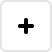
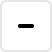
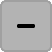
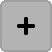
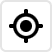
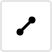
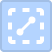
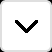
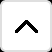
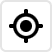
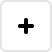
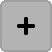
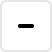
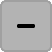
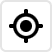
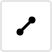
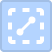
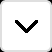
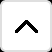
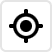

In [3]:
LetsPlot.setup_html()

In [4]:
formulas = [
    r"\(a\)",
    r"\(a \quad + \: 1\)",
    r"\( \alpha \cdot b + \gamma \)",
    r"\((a - b)(a + b)\)",
    r"\((a / (\Delta / c))\)",
    r"\(2^3\)",
    r"\(\Alpha + \alpha^{\Beta + \beta^{\Gamma + \gamma_{\Delta + \delta + \Delta} + \Gamma} + \Beta} + \Alpha\)",
    r"t\(^2\)",
    r"\((\eta + a^{d})(\eta - a^d)\)",
    r"\(a_2 x^2\)",
    r"\(\Alpha\Beta_{\gamma\delta}\Sigma^\infty\)",
    r"\((1 + (a^2 + 2))(b^{2\theta - 1} - (c^{-1} / \chi_i))\)",
    r"\(\frac{a}{b}\)",
    r"\(a + \frac{b}{c}\)",
    r"\(\frac{a}{b} + c\)",
    r"\(\frac{a}{b} + \frac{c}{d}\)",
    r"\(\frac{a + b}{d} + \frac{d}{e + f}\)",
    r"\(\frac{a}{b + c} + \frac{d + e}{f}\)",
    r"\(10^{1000} - \frac{\Alpha^\beta - \gamma_\Delta}{\Omega} - \frac{\omega}{\alpha_\Beta - \Gamma^\delta} - 1000^{10}\)",
    r"\(\alpha^\frac{a + b}{c} + \beta_{\frac{d}{e + f}}\)",
    r"\(A^{\frac{a^2}{b_1 + c_1} + \frac{d_1 + e_1}{f^2}} + \frac{B + C^2}{D^2 + E}\)",
    r"\(1^{2^{\frac{3^4 + 3}{3^4 + 3} + 3} + 2} + 1^{2^{\frac{3^4 + 3}{3^4 + 3} + 3} + 2}\)",
    r"ABC & \(a + \frac{b + c + d}{e} + f\) & DEF",
    r'<a href="https://github.com">GitHub</a> & \(a + \frac{b + c + d}{e} + f\) & <a href="https://github.com">GitHub</a>',
]
additional_formulas = [
    r"*Markdown* & \(a + \frac{b + c + d}{e} + f\) & *Markdown*",
    r"**Markdown** & \(a + \frac{b + c + d}{e} + f\) & **Markdown**",
    r"<span style='color:red'>Markdown</span> & \(a + \frac{b + c + d}{e} + f\) & <span style='color:red'>Markdown</span>",
    r"\(a + \frac{b + c + d}{e} + f\)" + '  \n' + r"\(a + \frac{b + c + d}{e} + f\)",
]

In [5]:
def formula_to_plot1(formula, n=None, hjust=None, nudge_x=None, livemap=False):
    p = ggplot()
    if livemap:
        p += geom_livemap()
    p += geom_hline(yintercept=0, color="white", tooltips='none') + \
        geom_vline(xintercept=0, color="white", tooltips='none') + \
        geom_text(x=0, label=formula, size=10, color="blue",
                  hjust=hjust, nudge_x=nudge_x) + \
        theme_void() + \
        theme(plot_background=element_rect(fill="#eeeeee", size=2),
              plot_title=element_markdown(size=10))
    if n is not None:
        latex = formula.replace(r"\(", "$").replace(r"\)", "$")
        p += ggtitle('**LaTeX #{0}:** "{1}"'.format(n, latex.replace("^", r"\^")))
    return p

def formula_to_plot2(formula, n=None, hjust=None, nudge_x=None, livemap=False):
    p = ggplot()
    if livemap:
        p += geom_livemap()
    p += geom_hline(aes(yintercept=[0, -.25, .25]), color="white", tooltips='none') + \
        geom_vline(xintercept=0, color="white", tooltips='none') + \
        geom_text(x=0, label=formula, size=1, size_unit='y', color="blue",
                  hjust=hjust, nudge_x=nudge_x) + \
        ylim(-.6, .6) + \
        theme_void() + \
        theme(plot_background=element_rect(fill="#eeeeee", size=2),
              plot_title=element_markdown(size=10))
    if n is not None:
        latex = formula.replace(r"\(", "$").replace(r"\)", "$")
        p += ggtitle('**LaTeX #{0}:** "{1}"'.format(n, latex.replace("^", r"\^")))
    return p

def formula_to_plot3(formula, n=None, hjust=None, **args):
    caption = None
    if n is not None:
        latex = formula.replace(r"\(", "$").replace(r"\)", "$")
        caption = '**LaTeX #{0}:** "{1}"'.format(n, latex.replace("^", r"\^"))
    return ggplot() + \
        geom_point(x=0, color="rgba(0,0,0,0)", tooltips='none') + \
        theme_void() + \
        labs(title=formula, caption=caption) + \
        theme(plot_background=element_rect(fill="#eeeeee", size=2),
              plot_title=element_markdown(size=20, margin=[20, 0, 0, 0], hjust=hjust, color="blue"),
              plot_caption=element_markdown(hjust=0))

def formulas_plot(plot_function, formulas_list=formulas, width=1000, height=1500, **args):
    return gggrid([
        plot_function(formula, n=i, **args)
        for i, formula in enumerate(formulas_list)
    ], ncol=2) + ggsize(width, height)

### Centered `hjust`

In [6]:
formulas_plot(formula_to_plot1)

In [7]:
formulas_plot(formula_to_plot2)

In [8]:
formulas_plot(formula_to_plot3, formulas_list=formulas + additional_formulas, height=2300, hjust=0.5)

### `hjust='left'`

In [9]:
formulas_plot(formula_to_plot1, hjust='left', nudge_x=-.5)

In [10]:
formulas_plot(formula_to_plot3, formulas_list=formulas + additional_formulas, height=2300, hjust=.1)

### `hjust='right'`

In [11]:
formulas_plot(formula_to_plot1, hjust='right', nudge_x=.5)

In [12]:
formulas_plot(formula_to_plot3, formulas_list=formulas + additional_formulas, height=2300, hjust=.6)

### Line heights

In [13]:
def get_bin_digits(n):
    return [
        tuple([0]*(n - len(l)) + l)
        for l in [
            [int(d) for d in bin(v).replace('0b', '')]
            for v in range(2**n)
        ]
    ]

def get_labels(n):
    labels = [r"\( A_[] \)", r"\( \frac{ B_[] }{ C_[] } \)"]
    return [
        "\n".join([labels[d].replace("[]", "{ " + str(i + 1) + " }") for i, d in enumerate(digits)])
        for digits in get_bin_digits(n)
    ]

def labels_plot(labels, ncol):
    data = {
        'x': [i % ncol for i in range(len(labels))],
        'y': [-int(i / ncol) for i in range(len(labels))],
        'l': labels,
    }
    return ggplot(data, aes('x', 'y')) + \
        geom_label(aes(label='l')) + \
        xlim(-.25, ncol - .75) + ylim(.25, -int((len(labels) - 1) / ncol) - .25)

labels = (get_labels(2) + get_labels(3) + get_labels(4) + get_labels(5))[:]
labels_plot(labels, ncol=20) + ggsize(1000, 800)

In [14]:
def vertically_aligned_labels_plot(vjust, use_frac, lineheight=None):
    if use_frac:
        label = "A\n\\( \\frac{B}{C} \\)"
    else:
        label = "A\nB"
    return ggplot() + \
        geom_label(y=1, label=label, lineheight=lineheight, vjust=vjust) + \
        geom_point(y=1, color="red", shape=3) + \
        ggtitle("vjust={0}".format(vjust))

In [15]:
gggrid([
    vertically_aligned_labels_plot(None, False),
    vertically_aligned_labels_plot(None, True),
    vertically_aligned_labels_plot('top', False),
    vertically_aligned_labels_plot('top', True),
    vertically_aligned_labels_plot('center', False),
    vertically_aligned_labels_plot('center', True),
    vertically_aligned_labels_plot('bottom', False),
    vertically_aligned_labels_plot('bottom', True),
    vertically_aligned_labels_plot('inward', False),
    vertically_aligned_labels_plot('inward', True),
    vertically_aligned_labels_plot('outward', False),
    vertically_aligned_labels_plot('outward', True),
], ncol=4)

In [16]:
gggrid([
    vertically_aligned_labels_plot(None, False, lineheight=3),
    vertically_aligned_labels_plot(None, True, lineheight=3),
    vertically_aligned_labels_plot('top', False, lineheight=3),
    vertically_aligned_labels_plot('top', True, lineheight=3),
    vertically_aligned_labels_plot('center', False, lineheight=3),
    vertically_aligned_labels_plot('center', True, lineheight=3),
    vertically_aligned_labels_plot('bottom', False, lineheight=3),
    vertically_aligned_labels_plot('bottom', True, lineheight=3),
    vertically_aligned_labels_plot('inward', False, lineheight=3),
    vertically_aligned_labels_plot('inward', True, lineheight=3),
    vertically_aligned_labels_plot('outward', False, lineheight=3),
    vertically_aligned_labels_plot('outward', True, lineheight=3),
], ncol=4)

### In label

In [17]:
label_formula = "First: \\( \\Omega \\cdot \\frac{ 10 - a^{b_1} }{\\sigma} \\)\n" \
                "Second: \\( \\Theta_{ a_1 a_2 a_3 a_4 ... a_{n + 1} } \\)\n" \
                "Third\n" \
                "Fourth: \\( \\frac{A_1}{A_2} + \\frac{B_1}{B_2} + \\frac{C_1}{C_2} + \\frac{D_1}{D_2} + \\frac{E_1}{E_2} + \\frac{F_1}{F_2} \\)\n" \
                "Fifth and final one for the moment: \\( \\frac{\\Gamma}{\\Delta} \\)"
ggplot() + \
    geom_label(x=0, label=label_formula)

### In facet title

In [18]:
facet_data = {
    'x': [0, 0],
    'f': [r"\( \frac{A}{B} \)", "C"]
}

ggplot(facet_data, aes(x='x')) + \
    geom_point() + \
    facet_grid(x='f') + \
    theme_grey()

### Styles

In [19]:
def label_with_style(plot_formula, **options):
    return ggplot() + \
        geom_point(x=0, size=10, shape=3) + \
        geom_text(x=0, label=plot_formula, **options) + \
        ggtitle(str(options))

style_formula = "First: \\( \\Omega \\cdot \\frac{ 10 - a^{b_1} }{\\sigma} \\)  \n Second: \\( \\Theta_{ a_1 a_2 ... a_{n + 1} } \\)"
gggrid([
    label_with_style(style_formula, alpha=.25),
    label_with_style(style_formula, color="red"),
    label_with_style(style_formula, fill="yellow"),
    label_with_style(style_formula, size=12),
    label_with_style(style_formula, family="Times"),
    label_with_style(style_formula, fontface="italic"),
    label_with_style(style_formula, hjust='right'),
    label_with_style(style_formula, vjust='top'),
    label_with_style(style_formula, angle=30),
    label_with_style(style_formula, lineheight=3),
], ncol=3)

### All plot elements

In [20]:
def get_plot(plot_formula, *, facet_groups=["g1", "g2"], show_label=False):
    formula_data = {"x": [0, 1], "l": [plot_formula, plot_formula], "g": facet_groups}
    p = ggplot(formula_data, aes(x="x")) + \
        geom_bar(aes(color="g"), y=1, stat='identity', size=2,
                 fill="black", labels=layer_labels(['l']), tooltips='none') + \
        scale_x_continuous('X-axis title: "{0}"'.format(plot_formula)) + \
        scale_y_continuous('Y-axis title: "{0}"'.format(plot_formula), limits=[0, 3] if show_label else None) + \
        scale_color_discrete(name=plot_formula) + \
        labs(title='Title: "{0}"'.format(plot_formula),
             subtitle='Subtitle: "{0}"'.format(plot_formula),
             caption='Caption: "{0}"'.format(plot_formula)) + \
        facet_grid(x="g", scales="free") + \
        theme(legend_position='bottom')
    if show_label:
        p += geom_label(aes(label="l", color="g"), y=2, tooltips=layer_tooltips().title("@l").line("{0}|@l".format(plot_formula)))
    return p

In [21]:
# Take a look at the tooltips
get_plot(r"F: \( \Omega \cdot \frac{ 10 - a^{b_1} }{\sigma} \neq 0 \) (L)",
         show_label=True) + \
    ggsize(1000, 600)

In [22]:
# Take a look at the axis breaks
get_plot(r"F: \( \Omega \cdot \frac{ 10 - a^{b_1} }{\sigma} \neq 0 \) (L)",
         show_label=True) + \
    coord_polar() + \
    ggsize(1000, 600)

In [23]:
themed_plot = get_plot("\( a^2 \)")
custom_element_text = element_text(color="green", family="Times", face="italic", size=30)
gggrid([
    themed_plot,
    themed_plot + theme(text=custom_element_text),
    themed_plot + theme(plot_title=custom_element_text,
                        plot_subtitle=custom_element_text,
                        plot_caption=custom_element_text),
    themed_plot + theme(axis_title=custom_element_text),
    themed_plot + theme(legend_title=custom_element_text),
    themed_plot + theme(tooltip_text=custom_element_text,
                        axis_tooltip_text=custom_element_text),
], ncol=2) + ggsize(1000, 1000)

In [24]:
themed_polar_plot = themed_plot + coord_polar()
gggrid([
    themed_polar_plot,
    themed_polar_plot + theme(text=custom_element_text),
    themed_polar_plot + theme(plot_title=custom_element_text,
                              plot_subtitle=custom_element_text,
                              plot_caption=custom_element_text),
    themed_polar_plot + theme(axis_title=custom_element_text),
    themed_polar_plot + theme(legend_title=custom_element_text),
    themed_polar_plot + theme(tooltip_text=custom_element_text,
                              axis_tooltip_text=custom_element_text),
], ncol=2) + ggsize(1000, 1000)

### Regressions

In [25]:
# Horizontal alignment
gggrid([
    formula_to_plot1(formulas[13], hjust='left'),
    formula_to_plot1(formulas[13], hjust='middle'),
    formula_to_plot1(formulas[13], hjust='right'),
])

In [26]:
# Mix LaTeX and plain text
gggrid([
    gggrid([
        formula_to_plot1(r"AB-\(a + \frac{b + c}{d} + e\)-CD", hjust='left'),
        formula_to_plot1(r"AB-\(a + \frac{b + c}{d} + e\)-CD", hjust='middle'),
        formula_to_plot1(r"AB-\(a + \frac{b + c}{d} + e\)-CD", hjust='right'),
    ]),
    gggrid([
        formula_to_plot1(r"AAAAAA\( \frac{a + b}{c} + e \)", hjust='left'),
        formula_to_plot1(r"\( AAAAAA\frac{a + b}{c} + e \)", hjust='left'),
        formula_to_plot1(r"------\( \frac{a + b}{c} + e \)", hjust='left'),
        formula_to_plot1(r"AAAAAAAAAAAA\( \frac{a + b}{c} + e \)", hjust='left'),
    ], ncol=2)
], ncol=1) + ggsize(1000, 600)

In [27]:
# Mix LaTeX and links
gggrid([
    formula_to_plot1(formulas[23], hjust='left'),
    formula_to_plot1(formulas[23], hjust='middle'),
    formula_to_plot1(formulas[23], hjust='right'),
])

In [28]:
# LaTeX in title
gggrid([
    formula_to_plot3(formulas[13], hjust=.1),
    formula_to_plot3(formulas[13], hjust=.5),
    formula_to_plot3(formulas[13], hjust=.6),
])

In [29]:
# Wrong shift (from b/c)
formula_to_plot1(r"\( A^{a + \frac{b}{c} } \)", hjust='left') + ggsize(600, 100)

In [30]:
# Wrong shift (from B/C)
formula_to_plot1(r"\( A^{a + \frac{b}{c} } + \frac{B}{C} \)", hjust='left') + ggsize(600, 100)

In [31]:
# Wrong shift (after \alpha)
formula_to_plot1(formulas[19], hjust='left') + ggsize(600, 100)

In [32]:
# Wrong shift
formula_to_plot1(r"\( a^{b^{\frac{c}{d} + C} + B} + A \)", hjust='left') + ggsize(600, 100)

In [33]:
# Wrong shift (after 1^2)
formula_to_plot1(formulas[21], hjust='left') + ggsize(600, 100)

In [34]:
# Wrong shift #6 (after "a+")
formula_to_plot1(formulas[22], hjust='left') + ggsize(600, 100)

In [35]:
# Wrong positioning
formula_to_plot3(additional_formulas[3], hjust=0) + ggsize(600, 100)

In [36]:
%toggle_copy_spec_button off

Copy button is now DISABLED.
